# Wavenet Demo
Demo of our efficient generation implementation.

Trains wavenet on a single wav file. Then generates that file, starting from a single sample.

In [1]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

from IPython.display import Audio

%matplotlib inline

In [2]:
inputs, targets = make_batch('assets/voice.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=44100)

W0718 17:24:18.986466 140100224517888 deprecation_wrapper.py:119] From /home/nfarrugi/git_loc/fast-wavenet/wavenet/models.py:26: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 17:24:18.998153 140100224517888 deprecation_wrapper.py:119] From /home/nfarrugi/git_loc/fast-wavenet/wavenet/layers.py:136: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0718 17:24:19.004487 140100224517888 deprecation_wrapper.py:119] From /home/nfarrugi/git_loc/fast-wavenet/wavenet/layers.py:89: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0718 17:24:19.013512 140100224517888 deprecation.py:573] From /home/nfarrugi/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:574: calling conv1d (from tensorflow.python.ops.nn_ops) with data_format=NHWC is deprecated and will be removed in a future version.
Instructions for updating:
`NHWC` for data_format is deprecat

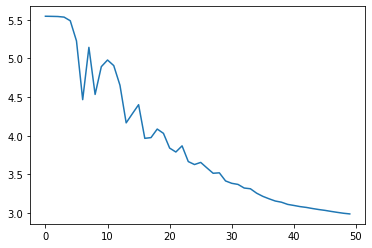

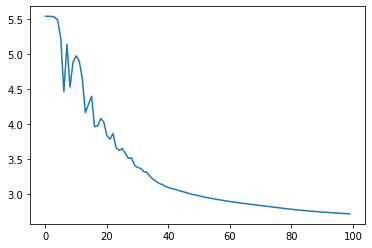

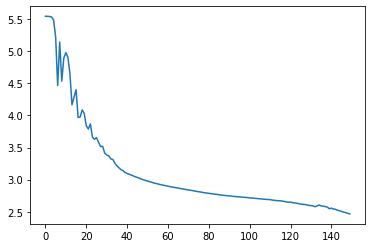

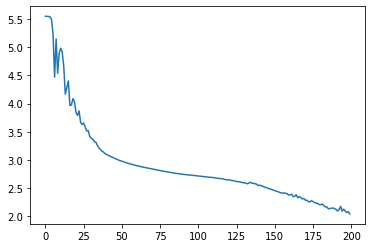

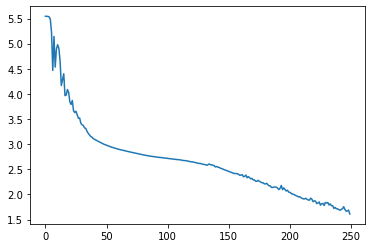

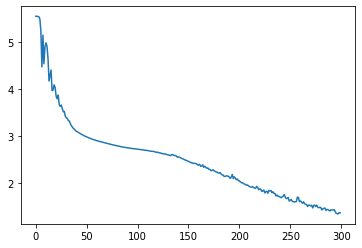

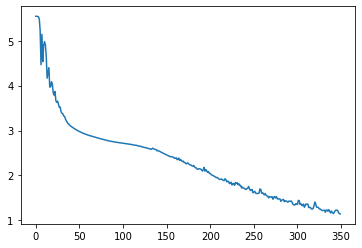

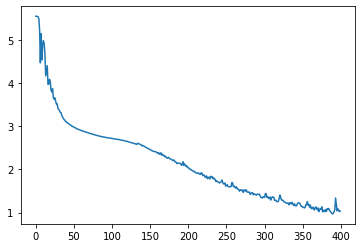

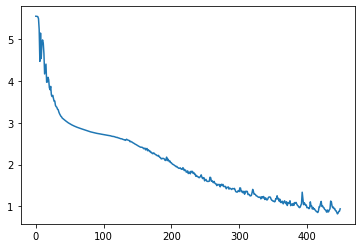

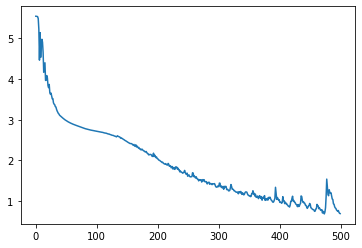

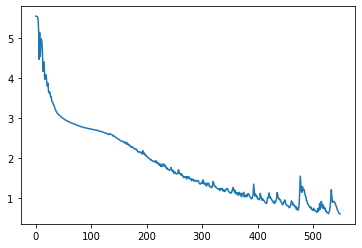

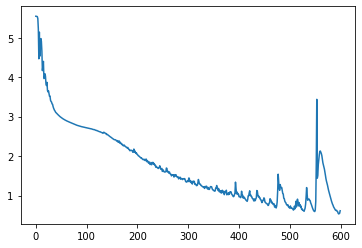

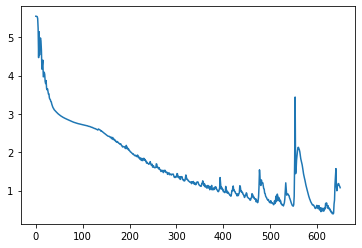

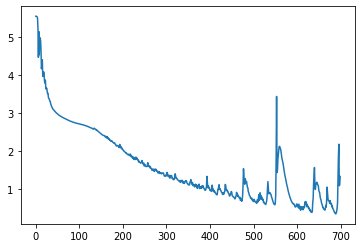

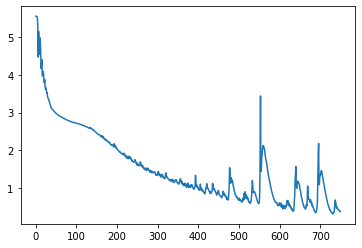

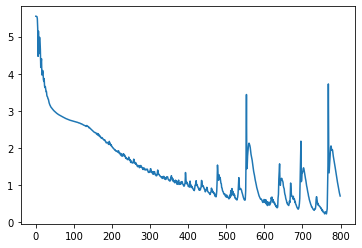

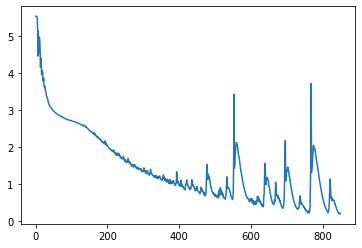

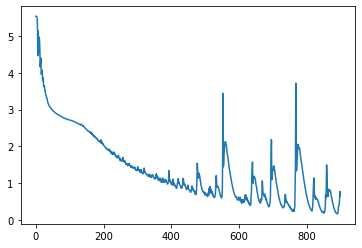

Training took 3884.240215063095 seconds.


In [3]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


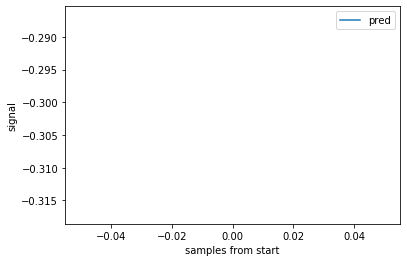

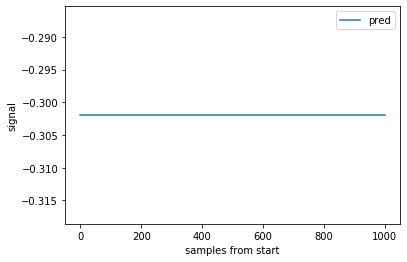

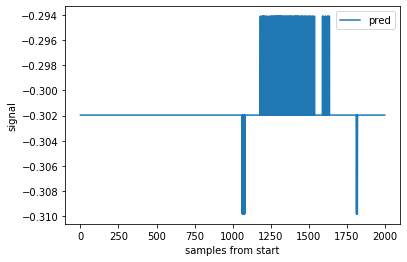

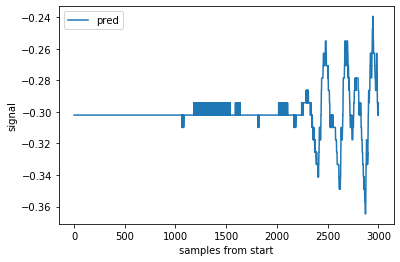

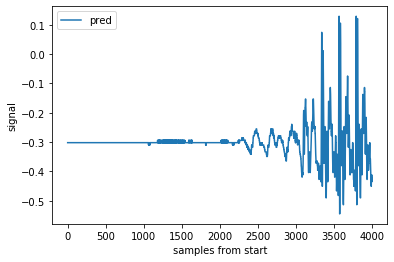

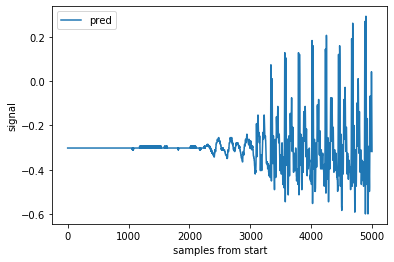

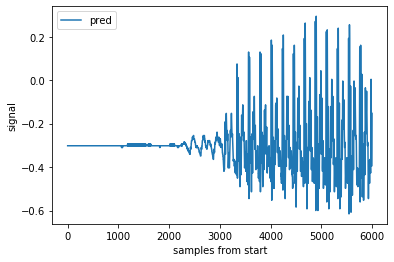

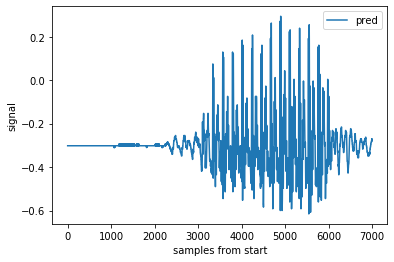

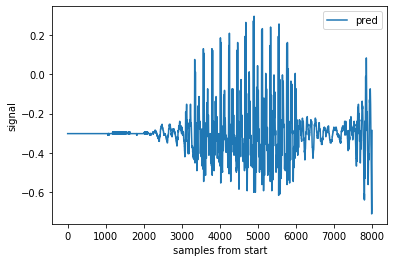

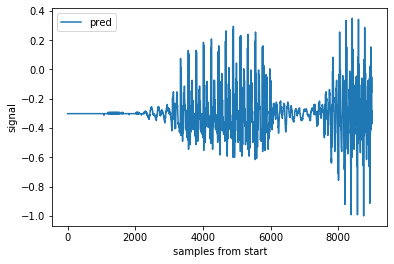

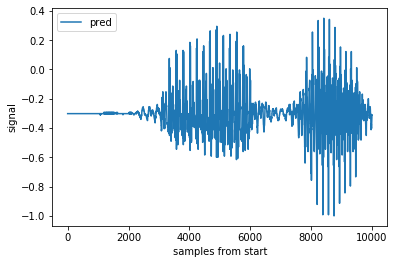

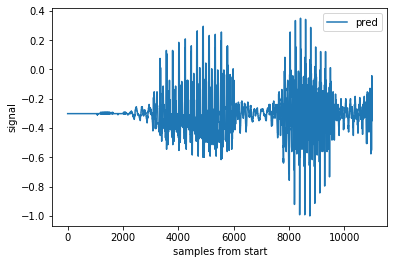

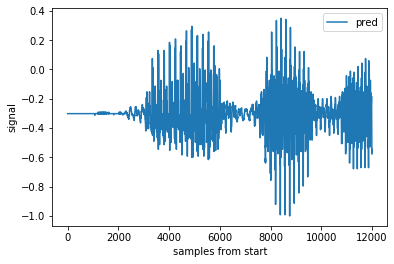

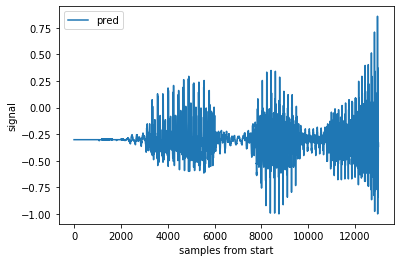

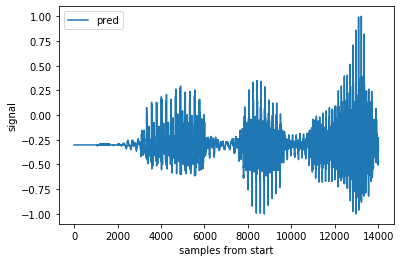

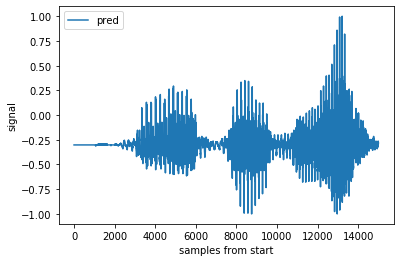

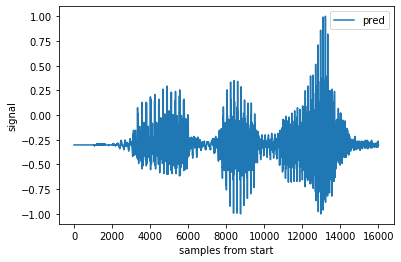

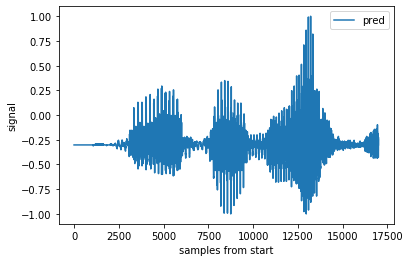

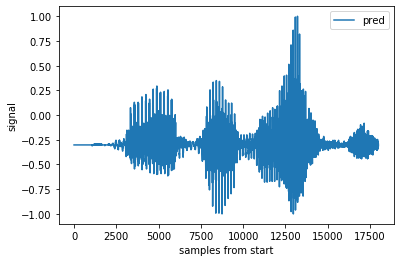

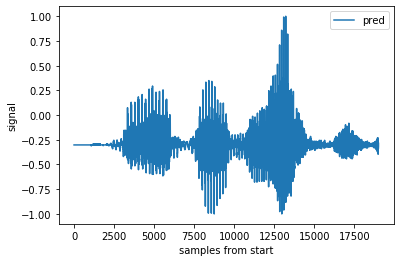

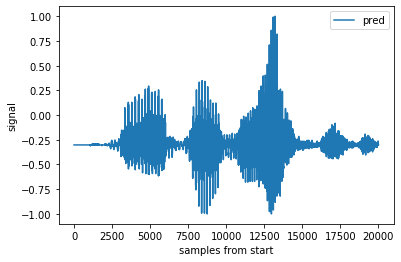

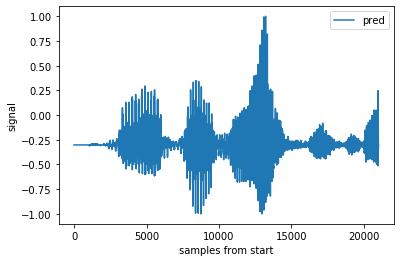

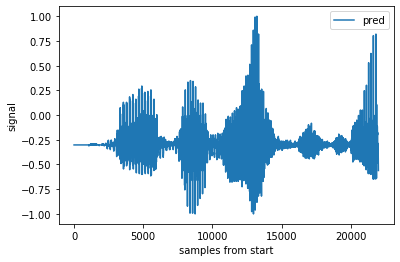

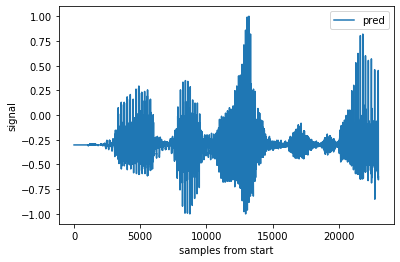

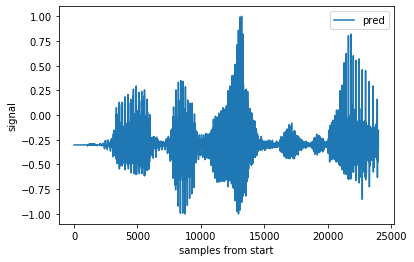

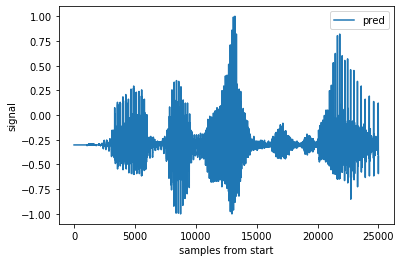

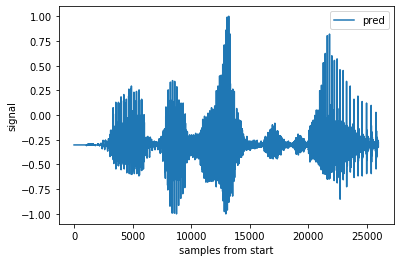

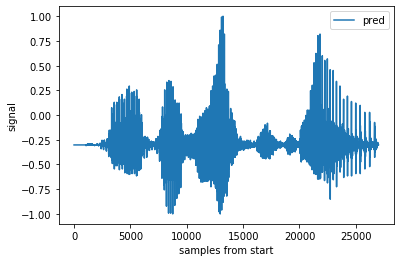

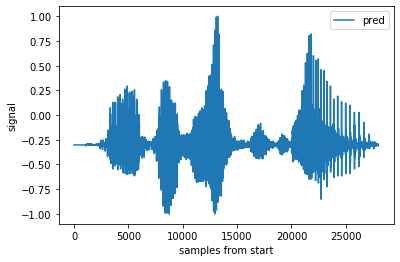

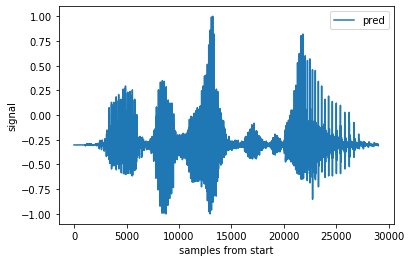

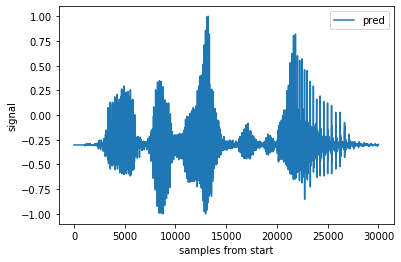

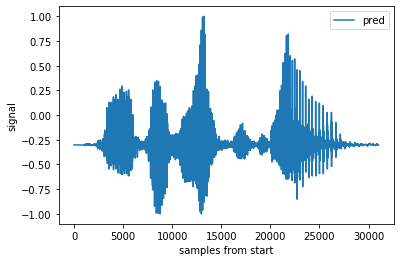

Generating took 129.0645990371704 seconds.


In [4]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 32000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [5]:
Audio(predictions, rate=44100)

In [7]:
input_

array([[-0.30196078]])

In [14]:
import numpy as np 


-1.0384464412779433

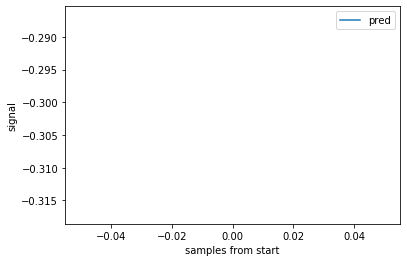

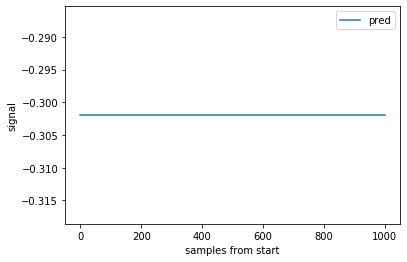

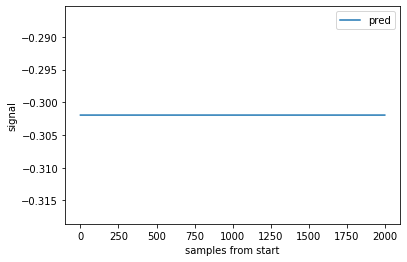

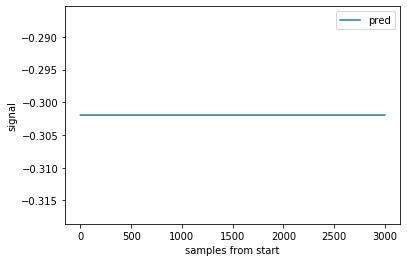

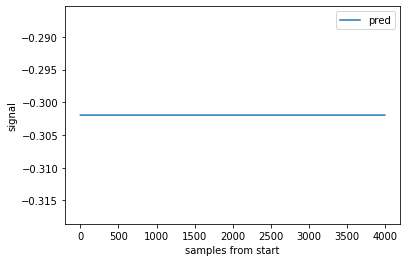

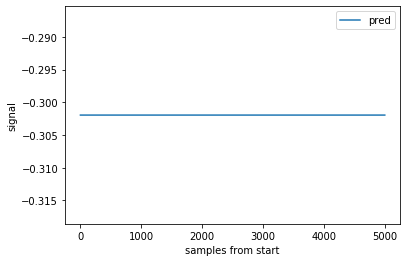

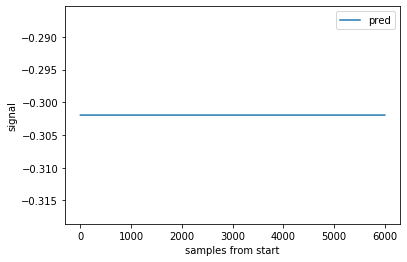

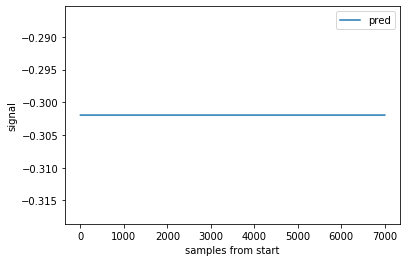

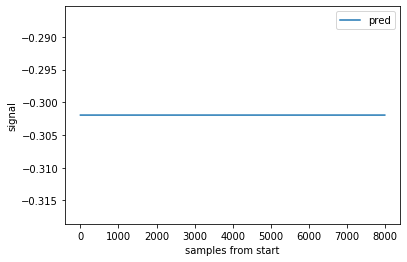

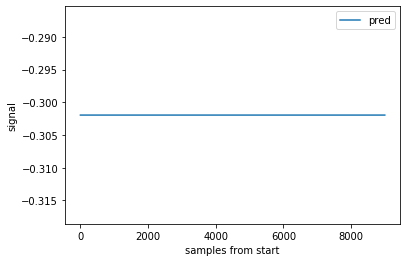

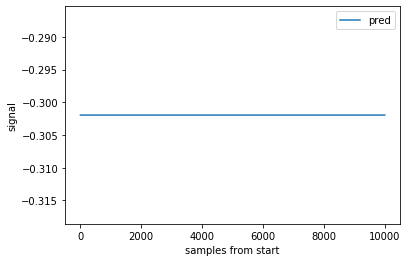

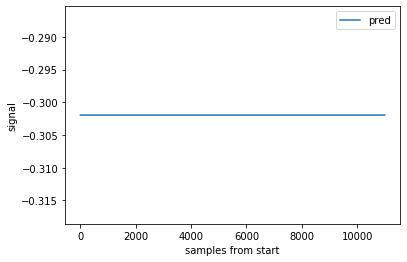

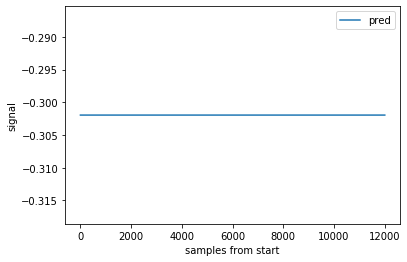

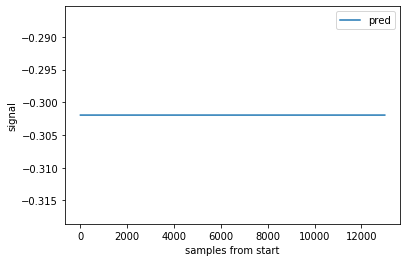

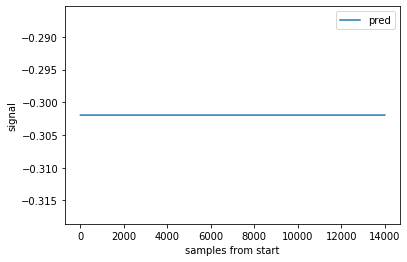

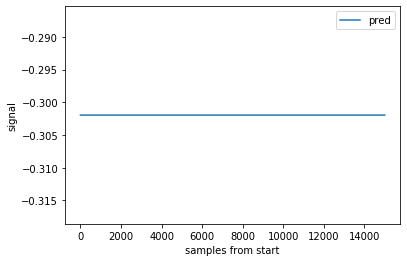

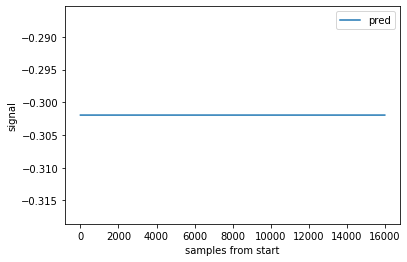

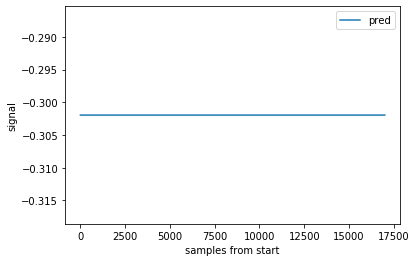

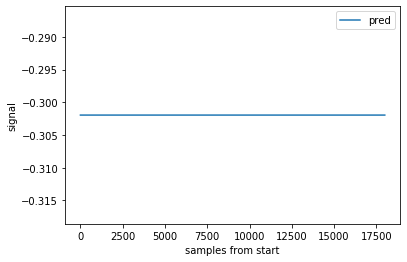

In [ ]:
new_pred = generator.run([[np.random.randn()]], 100000)

In [16]:
Audio(new_pred, rate=44100)